## Prediction 
An important aspect of data science is to find out what data can tell us about the future. What do data about climate and pollution say about temperatures a few decades from now? Based on a person's internet profile, which websites are likely to interest them? How can a patient's medical history be used to judge how well he or she will respond to a treatment?

To answer such questions, data scientists have developed methods for making predictions. In this chapter we will study one of the most commonly used ways of predicting the value of one variable based on the value of another.

The foundations of the method were laid by Sir Francis Galton. As we saw in Section 7.1, Galton studied how physical characteristics are passed down from one generation to the next. Among his best known work is the prediction of the heights of adults based on the heights of their parents. We have studied the dataset that Galton collected for this. The table heights contains his data on the midparent height and child's height (all in inches) for a population of 934 adult "children".

In [14]:
import  pandas as pd
import numpy as np
import matplotlib.ticker as tick
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib.patches as mpatches


In [2]:
galton=pd.read_csv('galton.csv')
galton

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5
...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0
930,203,62.0,66.0,66.64,3,2,female,62.0
931,203,62.0,66.0,66.64,3,3,female,61.0
932,204,62.5,63.0,65.27,2,1,male,66.5


In [3]:
heights=pd.DataFrame({'Midparent':galton['midparentHeight'],'Child':galton['childHeight']})
heights

,Midparent,Child
0,75.43,73.2
1,75.43,69.2
2,75.43,69.0
3,75.43,69.0
4,73.66,73.5
...,...,...
929,66.64,64.0
930,66.64,62.0
931,66.64,61.0
932,65.27,66.5


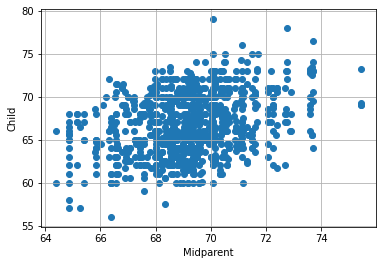

In [4]:
M=heights['Midparent']
C=heights['Child']
plt.scatter(M,C)
plt.grid()
plt.xlabel('Midparent')
plt.ylabel("Child")
plt.show()

The primary reason for collecting the data was to be able to predict the adult height of a child born to parents similar to those in the dataset. We made these predictions in Section 7.1, after noticing the positive association between the two variables.

Our approach was to base the prediction on all the points that correspond to a midparent height of around the midparent height of the new person. To do this, we wrote a function called predict_child which takes a midparent height as its argument and returns the average height of all the children who had midparent heights within half an inch of the argument.

In [11]:
def predict_child(mpht):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of mpht.
    
    The prediction is the average height of the children 
    whose midparent height is in the range mpht plus or minus 0.5 inches.
    """
    
    close_points = heights[(heights['Midparent'] >= mpht-0.5) & (heights['Midparent'] <= mpht + 0.5)]
    return  np.mean(close_points['Child'])

In [6]:
heights_with_predictions = heights.copy()
heights_with_predictions ['Prediction']=heights_with_predictions['Midparent'].apply(predict_child)
heights_with_predictions 

,Midparent,Child,Prediction
0,75.43,73.2,70.100000
1,75.43,69.2,70.100000
2,75.43,69.0,70.100000
3,75.43,69.0,70.100000
4,73.66,73.5,70.415789
...,...,...,...
929,66.64,64.0,65.156579
930,66.64,62.0,65.156579
931,66.64,61.0,65.156579
932,65.27,66.5,64.229630


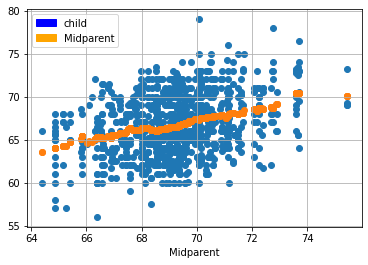

In [17]:
M=heights_with_predictions['Midparent']
C=heights_with_predictions['Child']
plt.scatter(M,C)
P=heights_with_predictions ['Prediction']
plt.scatter(M,P)
plt.grid()
plt.xlabel("Midparent")

blue_patch = mpatches.Patch(color='blue', label='child')
orange_patch = mpatches.Patch(color='orange', label='Midparent')
plt.legend(handles=[blue_patch,orange_patch ])
plt.show()

In [ ]:
The prediction at a given midparent height lies roughly at the center of the vertical strip of points at the given height. This method of prediction is called regression. Later in this chapter we will see where this term came from. We will also see whether we can avoid our arbitrary definitions of "closeness" being "within 0.5 inches". But first we will develop a measure that can be used in many settings to decide how good one variable will be as a predictor of another.